In [1]:
# note on high redshift standardizable candles

In [2]:
%matplotlib notebook

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
# print(os.path.basename('/abc/cde/asdfs.pdf'))
# print(os.path.dirname('/abc/sf/fcde/asdfs.pdf'))

In [5]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

#path = '/home/chensun/tomerv_storage/quasars_master/'
#sys.path.insert(0, path)
import igm as ig
import data as dt
import chi2 as ch
import cosmo as co

from ag_probs import omega_plasma

In [6]:
# OPTIONAL: import the a2a3 best fit
# used to compare with the axion fit. 

path = '/home/chen/Code/'
sys.path.insert(0, path)
from quasars_a2a3 import igm as ig_a23
from quasars_a2a3 import data as dt_a23
from quasars_a2a3 import chi2 as ch_a23
from quasars_a2a3 import cosmo as co_a23

# Load the data

In [7]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [8]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [9]:
pan_data = dt.load_pantheon('./likelihoods',
                   'lcparam_full_long.dat',
                   'sys_full_long.dat',
                   1048,
                   True)

In [10]:
ch.use_loglkl = True
ch_a23.use_loglkl = True

In [11]:
# constructe the kwargs
# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

pan_kwargs = {'B': 1,
              'mg': omega_plasma(1.6e-8),
              's': 1,
              'omega': 1, # [eV]
              'axion_ini_frac': 0.,
              'smoothed': False,
              'redshift_dependent': True,
              'method': 'simps',
              'prob_func': 'norm_log',
              'Nz': 101,
              'skip_LumMod': False}

# Check the fit variable directly

-144.3865492663111


<IPython.core.display.Javascript object>


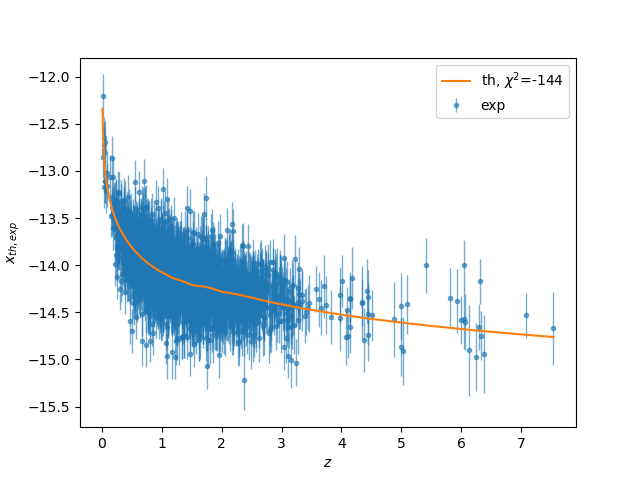

In [12]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta0, \
# qso_beta1, qso_z0, qso_delta)
# x = (_, _, 0.7, 3.37, 3.09, -5.5, 0.62, 7.66, 0.23)

# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.0, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.08)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 8)


OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68211518,   0.67408777, -13.06924146, -10.09478038, 0.62760049,   7.60214181,   0.22578225])

x = (10**logma, 10**logga, OmL, h0, -0.999999, -0.999999, qso_gamma, qso_beta, 0., 100., qso_delta)




(chi2, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.6)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, $\chi^2$=%.0f' %chi2)


#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

In [13]:
help(ch_a23.chi2_quasars)

Help on function chi2_quasars in module quasars_a2a3.chi2:

chi2_quasars(x, data=None, vectorize=True, full_output=False, dm_output=False, **kwargs)
    Computes quasars chi2.     **kwargs contain the arguments for LumMod.
    
    :param x: the theory point that contains (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
    :param data: must be have certain structures. See source code for the structure needed.
    :param vectorize: whether to vectorize the computation
    :param full_output: whether to output other quantities besides chi2, useful for testing.
    :param dm_output: whether to output the distance modulus and its error bar



-142.9001534443872


<IPython.core.display.Javascript object>


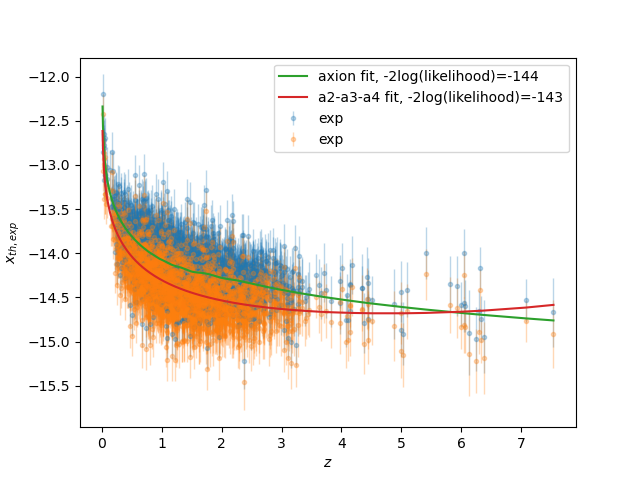

In [14]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)

# Lusso's best fit with SNe + quasars
# x = (_, _, 0.7, 3.37, 3.09, -3.5, 0.62, 7.66, 0.23)

# our best fit (large a4 range)
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)


ch_a23.use_loglkl = True

(chi2_1, 
 mu_th_1_arr, 
 mu_exp_1_arr, 
 sigma_1_arr,
 qso_z_1_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_1)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
plt.errorbar(qso_z_1_arr, mu_exp_1_arr, sigma_1_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='axion fit, -2log(likelihood)=%.0f' %chi2)

x, y = zip(*sorted(zip(qso_z_1_arr, mu_th_1_arr)))
plt.plot(x, y, '-', zorder=10, label='a2-a3-a4 fit, -2log(likelihood)=%.0f' %chi2_1)



#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

# Distance Modulus

<IPython.core.display.Javascript object>


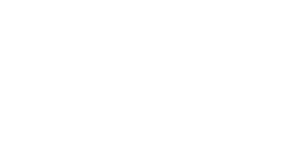

No handles with labels found to put in legend.


In [15]:
dm_fig, dm_ax = plt.subplots()
plt.ylabel('$\mu_{th, exp}$')
plt.xlabel('$z$')
plt.legend()
plt.close()

<IPython.core.display.Javascript object>


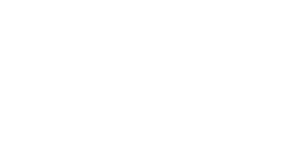

<IPython.core.display.Javascript object>


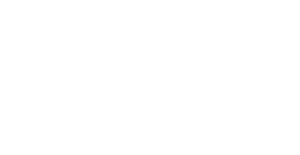

<IPython.core.display.Javascript object>


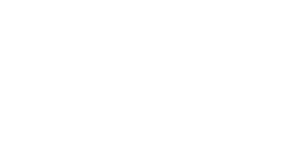

<IPython.core.display.Javascript object>


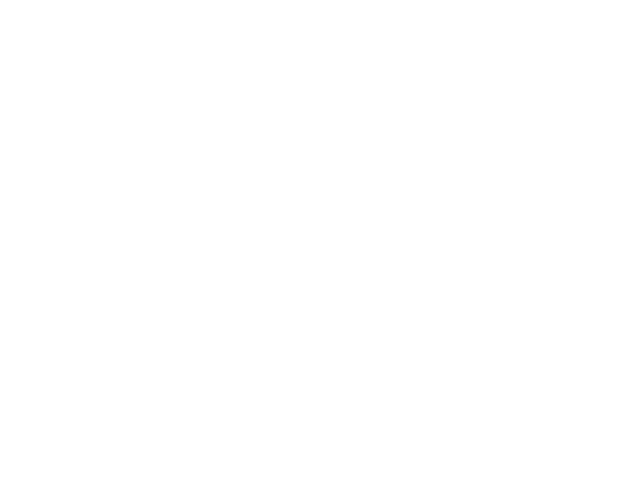

In [16]:
residual_fig, residual_ax = plt.subplots()
plt.title(r"residual")
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

residual2_fig, residual2_ax = plt.subplots()
# plt.title('a4 from Lusso, PAN+QSO')
# plt.title('a4 larger range, PAN+QSO')
plt.title(r"residual")
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

residual3_fig, residual3_ax = plt.subplots()
# plt.title('a4 from Lusso, PAN+QSO')
# plt.title('a4 larger range, PAN+QSO')
plt.title(r"residual")
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

residual_unnorm_fig, residual_unnorm_ax = plt.subplots()
# plt.title('a4 from Lusso, PAN+QSO')
# plt.title('a4 larger range, PAN+QSO')
plt.title(r"residual")
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

In [17]:
def binning(y, dyraw, delta=0):
    dy = np.sqrt(dyraw**2 + delta**2)
    dybar = 1/np.sqrt(np.sum(1/dy**2))
    ybar = np.sum(y/dy**2) * dybar**2
    return ybar, dybar

bins_lowz = np.arange(0.01, 2, 0.1) 
bins_midz = np.arange(2., 6., 0.5)
bins_highz = np.arange(6, 10, 1.)
bins = np.concatenate((bins_lowz, bins_midz, bins_highz))


# a2a3a4 fit

In [18]:
# do distance modulus instead, so that the data points don't shift (right?)


# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
# -Lusso's best fit with SNe + quasars-

# previous fit (small a4 range)
#x = (_, _, 0.7, 3.37, 3.09, -5.2, 0.62, 7.66, 0.23)
#x = (_, _, 0.7, 3.09, 4.83, -7.78, 0.62, 7.69, 0.23)

# our best fit (large a4 range) run045
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)




(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.28
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
x = (_, _, h0, a2, a3, a4, M0)
print("Pantheon -2log(likelihood):", ch_a23.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))



quasars -2log(likelihood): -142.9001534443872
Pantheon -2log(likelihood): -1166.011202364181


In [19]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp, a2a3a4', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, a2a3a4', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='a2-a3-a4, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
residual_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
                     fmt='.', 
                     ecolor='C0',
                     label='unbinned residual from a2-a3-a4', 
                     linewidth=1, 
                     zorder=10, 
                     alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual_ax.set_title('a2-a3-a4 bestfit w/ PAN+QSO')

# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C0-', 
                     ecolor='C0', 
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')

<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


# axion fit

In [20]:
# bestfit
# ['OmL', 'h0', 'logma', 'logga', 'qso_gamma', 'qso_beta', 'qso_delta']

# run047, QSO + Planck prior
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68211518,   0.67408777, -13.06924146, -10.09478038, 0.62760049,   7.60214181,   0.22578225])

# x = (10**logma*10**0.25, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
#x = (10**logma, 10**logga/3., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
#x = (10**logma, 10**logga/10., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
# x = (10**logma*4, 10**logga*16., OmL, h0, -1, -1, qso_gamma, qso_beta, qso_delta)
x = (10**logma, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta, 0., 100., qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.4
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# # check pantheon chi2:
# # (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
# # x = (_, _, h0, a2, a3, a4, M0)
# print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
#                                                       data=pan_data,
#                                                         vectorize=True,
#                                                        **pan_kwargs))



quasars -2log(likelihood): -144.38654960683257


In [21]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, 
               fmt='r.', 
               ecolor='r', 
               label='exp binned axion',
               linewidth=1,
               zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='axion bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
residual2_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
                     fmt='.', 
                     ecolor='C0',
                     label='exp', 
                     linewidth=1, 
                     zorder=10, 
                     alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual2_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='axion best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='--', 
                     #ecolor='r', 
                     label='axion best fit', linewidth=1, zorder=11)

residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual2_ax.set_title('axion bestfit w/ PAN+QSO')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C1-', 
                     ecolor='C1', 
                     label='axion best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')

<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<IPython.core.display.Javascript object>


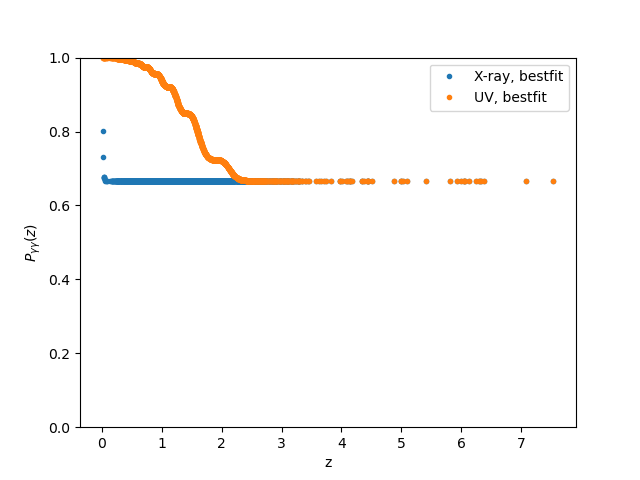

Text(0, 0.5, '$P_{\\gamma\\gamma}(z)$')

In [22]:
plt.subplots()
#plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, 16x $g_{a\gamma}$,  4x $m_a$')
#plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
# plt.plot(qso_z_arr, 10**logPggX_0_arr, '.', label='X-ray, bestfit')
# plt.plot(qso_z_arr, 10**logPggUV_0_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, bestfit')
plt.ylim(0,1)
plt.legend()
plt.xlabel('z')
plt.ylabel(r"$P_{\gamma\gamma}(z)$")

# $\beta(z)$ fit

In [23]:
# finding the best fit point

In [24]:
# (bf_chi2,
#  x_mesh,
#  y_mesh,
#  chi2_mins,
#  idx_mins_global,
#  x_arr, y_arr,
#  delta_arr,
#  _,
#  pts, 
#  blobs) = parse(directory="../quasars_betaz/chains/run049_betaz_two_betas",   
#                     chain_name="chain_1.h5",
#                     x_name="OmL",
#                     y_name="h0",
#                     bins=10)


# pts[363288]
# array([0.68020187, 0.67346292, 0.61895969, 7.69938118, 7.81716552,
#        1.64706455, 0.2258213 ])
# variables scanned: ['OmL', 'h0', 'qso_gamma', 'qso_beta0', 'qso_beta1', 'qso_z0', 'qso_delta']


In [25]:
# bestfit of run049, QSO + Planck prior
OmL, h0, logma, logga, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta = \
tuple([0.68020187, 0.67346292, -15, -15, 0.61895969, 7.69938118, 7.81716552, 1.64706455, 0.2258213])

x = (10**logma, 10**logga, OmL, h0, -1, -1, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.4
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# # check pantheon chi2:
# # (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
# # x = (_, _, h0, a2, a3, a4, M0)
# print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
#                                                       data=pan_data,
#                                                         vectorize=True,
#                                                        **pan_kwargs))



quasars -2log(likelihood): -145.64304119030356


In [26]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# dm binned
dm_ax.errorbar(z_bin_arr+0.05, dm_bin_arr, ddm_bin_arr, 
               fmt='k.', 
               ecolor='k', 
               label='exp binned beta(z), $z$ shifted by 0.05',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, 'k--', zorder=10, label=r'$\beta(z)$ bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
# residual3_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
#                      fmt='.', 
#                      ecolor='C0',
#                      label='exp', 
#                      linewidth=1, 
#                      zorder=10, 
#                      alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
# residual3_ax.errorbar(z_bin_arr, 
#                      (y_bin-dm_bin_arr)/ddm_bin_arr, 
#                      [0]*len(y_bin), 
#                      fmt='r-', 
#                      ecolor='r', 
#                      label='beta(z) best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='--', 
                     #ecolor='r', 
                     label='beta(z) best fit', linewidth=1, zorder=11)

residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
#residual2_ax.set_title('axion bestfit w/ PAN+QSO')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C2-', 
                     ecolor='C2', 
                     label='beta(z) best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')

<ipython-input-17-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-17-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<IPython.core.display.Javascript object>


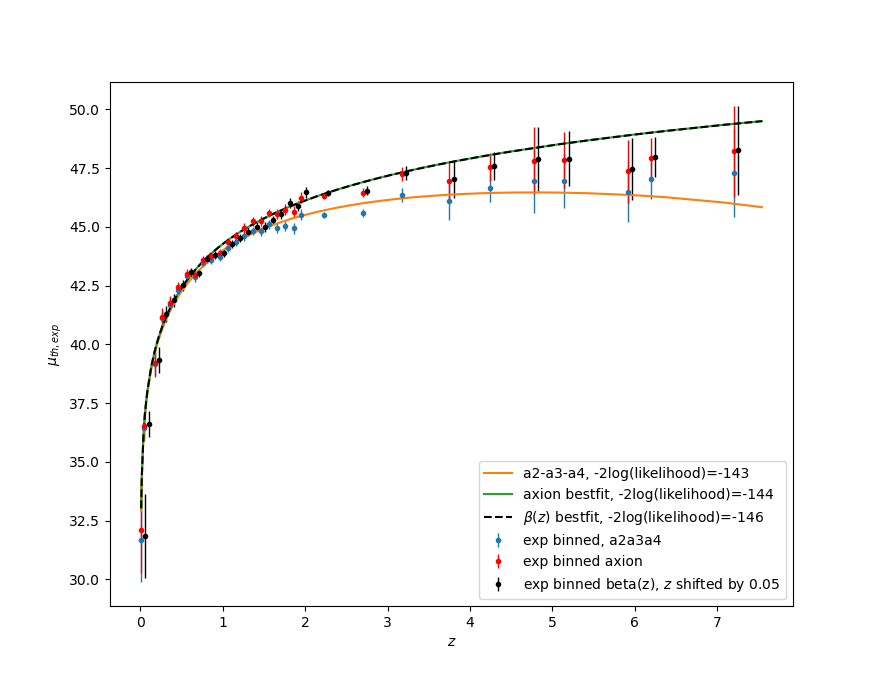

In [33]:
dm_fig

<IPython.core.display.Javascript object>


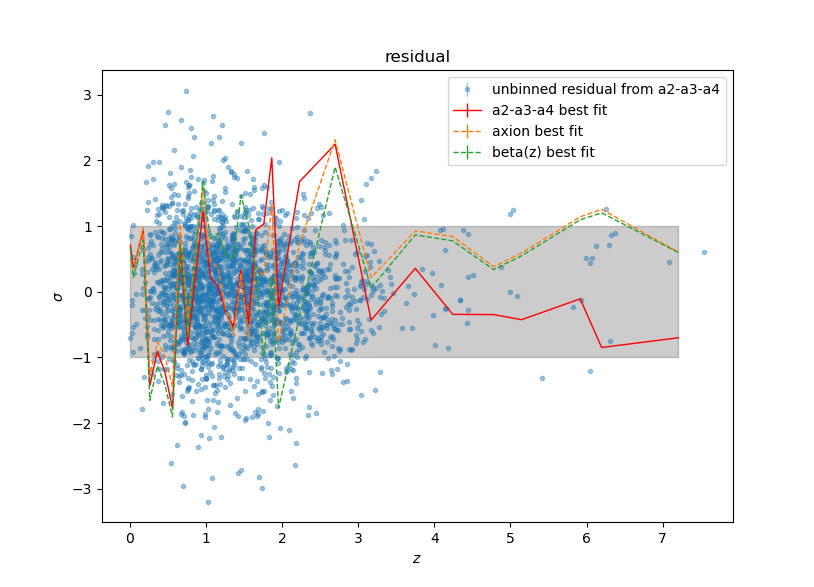

In [34]:
residual_ax.legend()
residual_fig

<IPython.core.display.Javascript object>


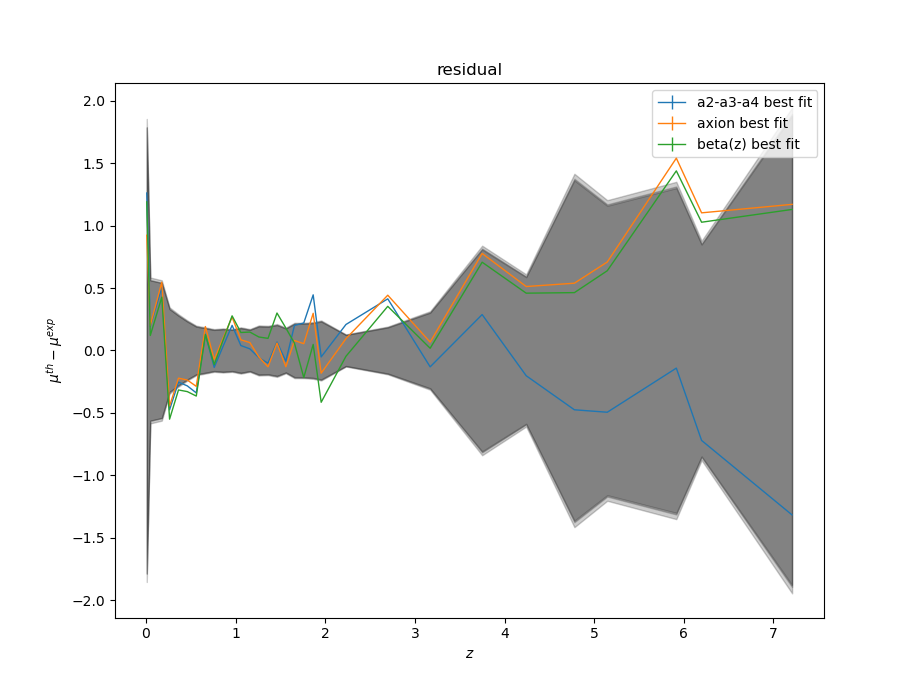

In [35]:
residual_unnorm_ax.legend()
residual_unnorm_fig

In [30]:
#residual2_fig

In [31]:
# oscillation at the best fit


In [32]:
# logPggX_0_arr = logPggX_arr
# logPggUV_0_arr = logPggUV_arr